In [26]:
%pylab inline

import numpy
import scipy
import pandas

from matplotlib import pyplot

from functools import reduce

import seaborn
pylab.rcParams['figure.figsize'] = (24.0, 15.0)

Populating the interactive namespace from numpy and matplotlib


In [91]:
good_videos = ['funnybaby.avi', 'camerachanges.mp4', 'slowmovesscene.mp4']

In [92]:
files = ['interpolacion_lineal_ecm_psnr.csv', 'mas_cercano_ecm_psnr.csv', 'splines_ecm_psnr.csv']
a = pandas.DataFrame()
for f in files:
    q = pandas.read_csv(f)
    q['metodo'] = f[:-13]
    a = pandas.concat([a, q], ignore_index = True)

In [93]:
a = a[numpy.in1d(a.Video, good_videos)]

In [94]:
%cd ../../informe/graficos/

/home/martin/TP/Metodos Numericos/metnum-TP3/informe/graficos


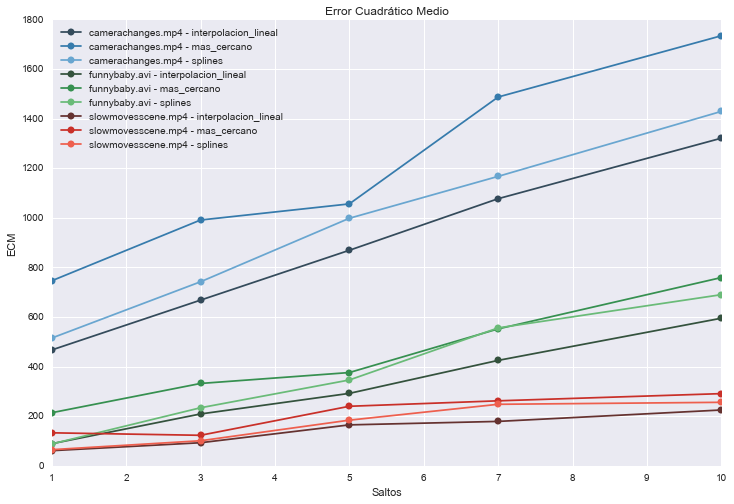

In [95]:
palettes = ['Blues_d', 'Greens_d', 'Reds_d']

for p, video in enumerate(numpy.unique(a.Video)):
    for c, metodo in enumerate(numpy.unique(a.metodo)):
        g = a[(a.metodo == metodo) & (a.Video == video)]
        pyplot.plot(g.Salto, g.PromECM, '-o', label = '{} - {}'.format(video, metodo), c = seaborn.color_palette(palette = palettes[p])[2 * c])

pyplot.title('Error Cuadrático Medio')
pyplot.xlabel('Saltos')
pyplot.ylabel('ECM')
pyplot.legend(loc = 2)

pyplot.savefig('ecm.png', bbox_inches='tight')

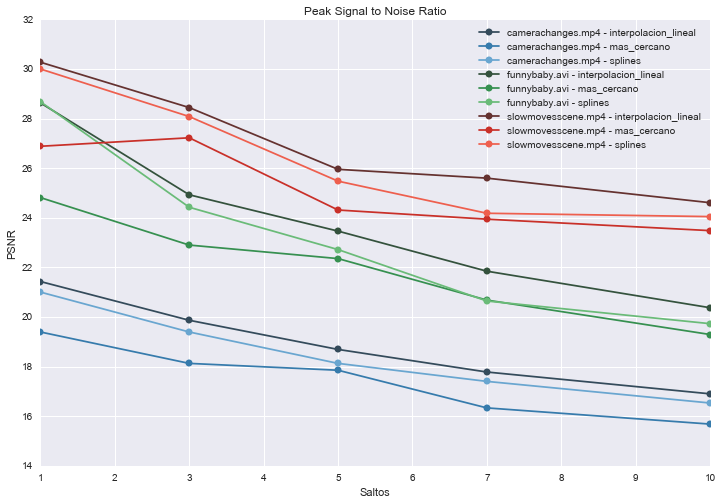

In [96]:
palettes = ['Blues_d', 'Greens_d', 'Reds_d']

for p, video in enumerate(numpy.unique(a.Video)):
    for c, metodo in enumerate(numpy.unique(a.metodo)):
        g = a[(a.metodo == metodo) & (a.Video == video)]
        pyplot.plot(g.Salto, g.PromPSNR, '-o', label = '{} - {}'.format(video, metodo), c = seaborn.color_palette(palette = palettes[p])[2 * c])

pyplot.title('Peak Signal to Noise Ratio')
pyplot.xlabel('Saltos')
pyplot.ylabel('PSNR')
pyplot.legend(loc = 0)

pyplot.savefig('psnr.png', bbox_inches = 'tight')

/usr/lib/python3.5/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
/usr/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


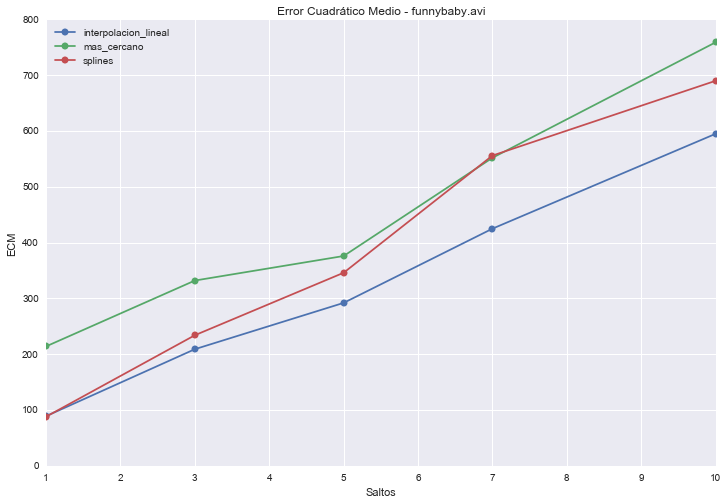

In [97]:
h = a[a.Video == 'funnybaby.avi']
for color, metodo in enumerate(numpy.unique(a.metodo)):
    g = h[a.metodo == metodo]
    pyplot.plot(g.Salto, g.PromECM, '-o', label = metodo, c = seaborn.color_palette()[color])
    
pyplot.title('Error Cuadrático Medio - funnybaby.avi')
pyplot.xlabel('Saltos')
pyplot.ylabel('ECM')
pyplot.legend(loc = 2)

pyplot.savefig('ecm_funnybaby.png', bbox_inches = 'tight')

In [98]:
%pwd

'/home/martin/TP/Metodos Numericos/metnum-TP3/informe/graficos'

In [99]:
metodos = ['cercanos', 'lineal', 'splines']

t = pandas.DataFrame()
for m in metodos:
    g = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/measureTimes/{}Times'.format(m))
    g['metodo'] = m
    t = pandas.concat([t, g], ignore_index = True)

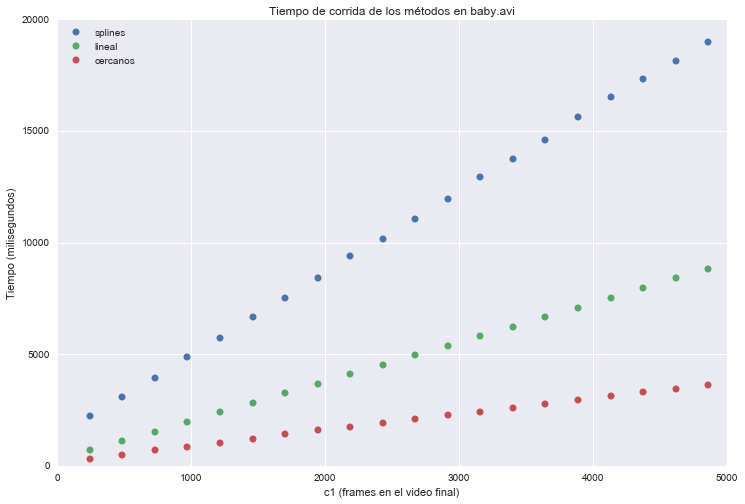

In [100]:
for m in numpy.unique(t.metodo)[::-1]:
    h = t[t.metodo == m]
    pyplot.plot(h.Salto * 243, h.time, 'o', label = m)

pyplot.title('Tiempo de corrida de los métodos en baby.avi')
pyplot.xlabel('c1 (frames en el video final)')
pyplot.ylabel('Tiempo (milisegundos)')
pyplot.legend(loc = 2)

pyplot.savefig('tiempo_baby.png', bbox_inches = 'tight')

In [101]:
r = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/measureTimes/baby_reset_2.txt')

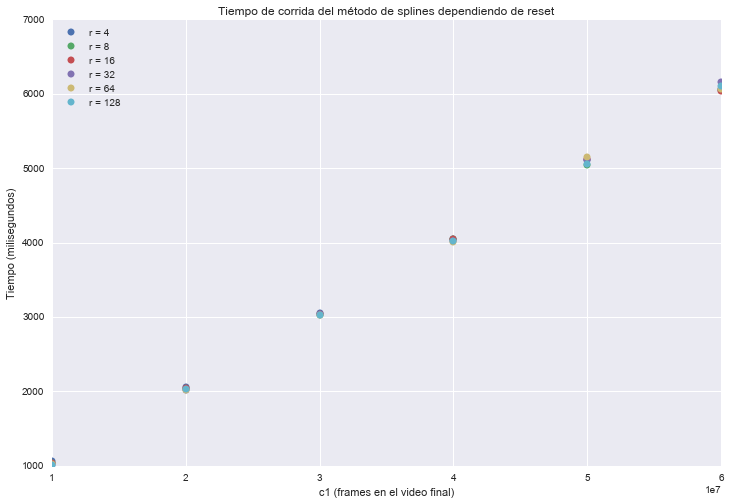

In [103]:
pyplot.gca().get_xaxis().get_offset_text()

for t in numpy.unique(r.reset):
    h = r[r.reset == t]
    pyplot.plot(h.c1, h.time, 'o', label = 'r = {}'.format(t))
    
pyplot.title('Tiempo de corrida del método de splines dependiendo de reset')
pyplot.xlabel('c1 (frames en el video final)')
pyplot.ylabel('Tiempo (milisegundos)')
pyplot.legend(loc = 2)

pyplot.savefig('tiempo_reset.png', bbox_inches = 'tight')

In [111]:
q = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/resultados/splines_ecm_psnr.csv', usecols = ['Video', 'Salto', 'PromECM'])
q = q[q.Video == 'baby.avi'].drop('Video', axis = 1)# .rename(columns = {'Salto': 'cl', 'PromECM': 'ecm'})

h = pandas.read_csv('/home/martin/TP/Metodos Numericos/metnum-TP3/src/measureTimes/baby_reset_ecm.txt')
h = h.append(q).fillna('c1 (corrida sin reset)')

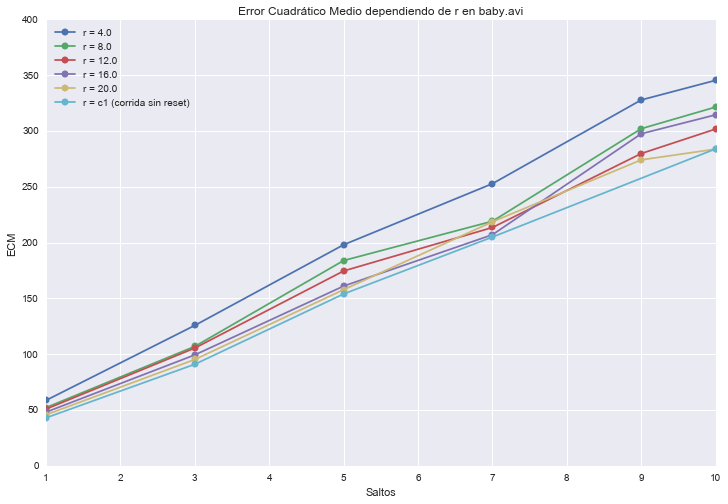

In [112]:
for r, t in h.groupby('Reset'):
    pyplot.plot(t.Salto, t.PromECM, '-o', label = 'r = {}'.format(r))

pyplot.title('Error Cuadrático Medio dependiendo de r en baby.avi')
pyplot.xlabel('Saltos')
pyplot.ylabel('ECM')

pyplot.xlim(h.Salto.min(), min(h.Salto.max(), q.Salto.max()))
pyplot.legend(loc = 0)

pyplot.savefig('ecm_reset.png', bbox_inches = 'tight')

In [41]:
pylab.rcParams['figure.figsize'] = (12.0, 8.0)

In [21]:
%cd '/home/martin/TP/Metodos Numericos/metnum-TP3/src/resultados/ecm'

/home/martin/TP/Metodos Numericos/metnum-TP3/src/resultados/ecm


In [58]:
q = {}
for k in ['camerachanges', 'fastmovescene', 'funnybaby', 'slowmovesscene']:
    p = [pandas.read_csv('frames_{}_{}.csv'.format(k, e), index_col = 'frame').rename(columns = {'ECM': x}).drop('Convirtiendo texto a pepe.avi') for e, x in enumerate(['Mas Cercano', 'Interpolacion Lineal', 'Splines'], start = 1)]
    q[k] = reduce(lambda x, y: x.join(y), p)

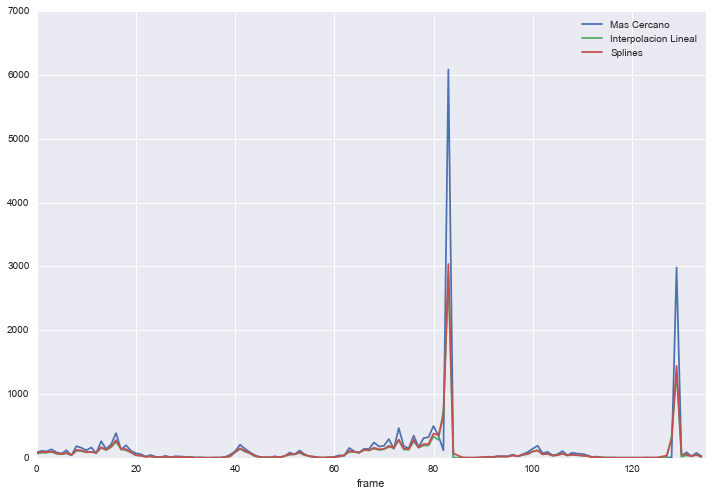

In [42]:
q['slowmovesscene'].plot()

In [59]:
f

,Mas Cercano,Interpolacion Lineal,Splines
frame,,,
0,84.315612,65.816367,73.350586
1,108.419310,78.310495,91.797005
2,100.858177,81.374779,86.659310
3,133.785456,91.837396,98.807122
4,84.237018,63.186628,69.792500
5,65.369297,54.613854,59.960690
6,118.672799,70.078646,76.970221
7,37.480443,40.498008,42.532943
8,181.971263,109.131862,124.723294


In [87]:
q['slowmovesscene'].index.map(int)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134])

In [88]:
for h in q:
    q[h].index = q[h].index.map(int)

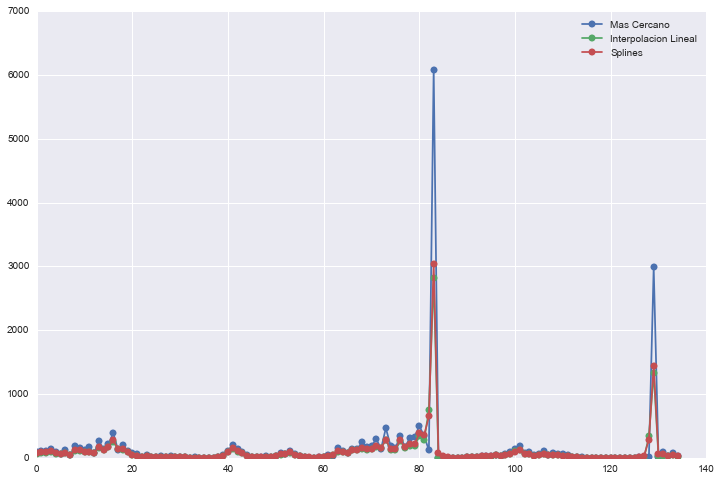

In [93]:
f = q['slowmovesscene']

llim = -1
rlim = 10000
for i in f:
    pyplot.plot(f[(f.index >= llim) & (f.index <= rlim)][i], '-o', label = i)
    
pyplot.legend()

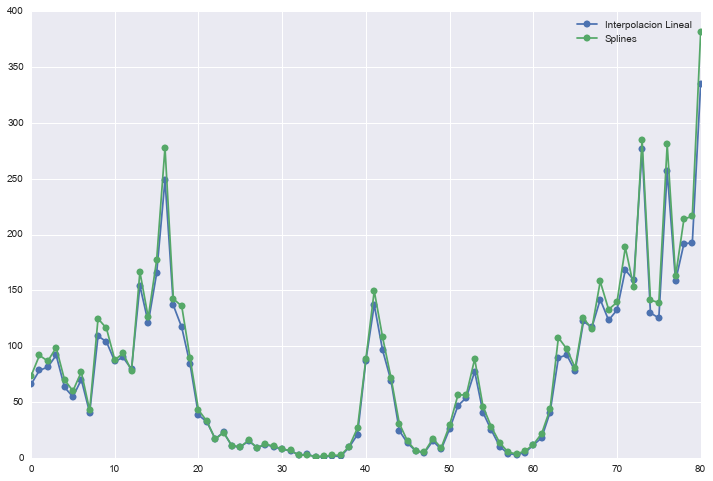

In [99]:
f = q['slowmovesscene']

llim = 0
rlim = 80
for i in ['Interpolacion Lineal', 'Splines']:
    pyplot.plot(f[(f.index >= llim) & (f.index <= rlim)][i], '-o', label = i)
    
pyplot.legend()

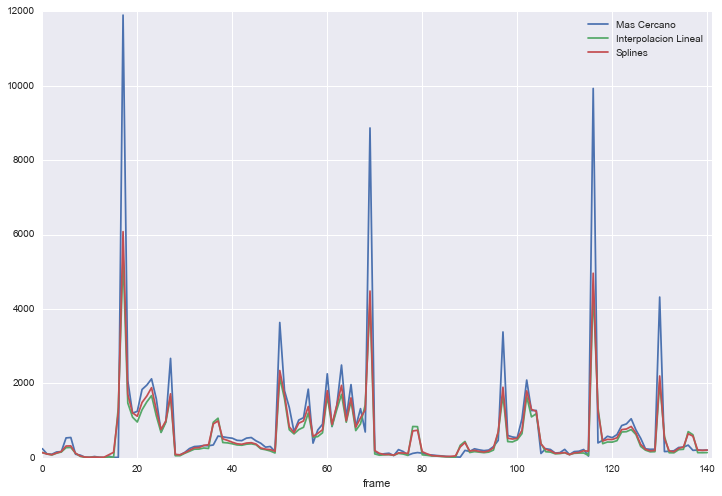

In [44]:
q['camerachanges'].plot()

In [105]:
f.index.max()

26

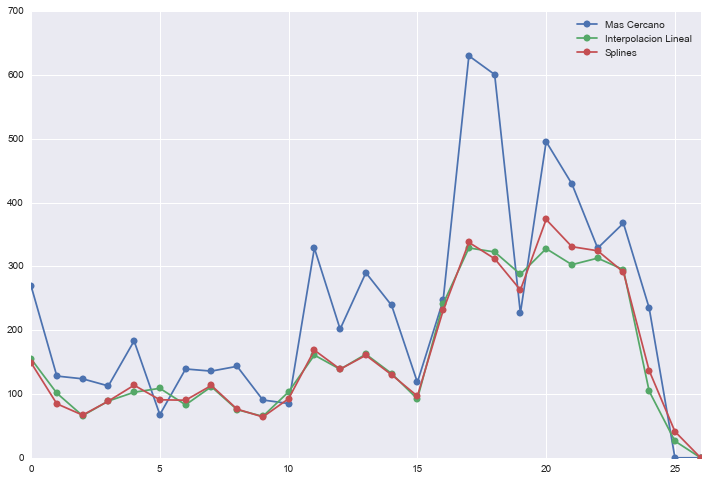

In [106]:
f = q['funnybaby']

for t in f:
    pyplot.plot(f[t], '-o', label = t)
    
pyplot.xlim([f.index.min(), f.index.max()])
    
pyplot.legend()